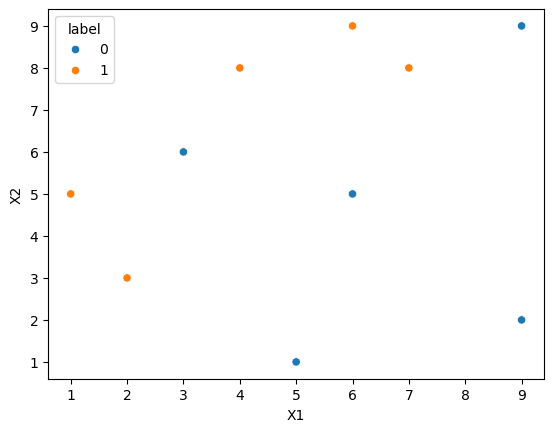

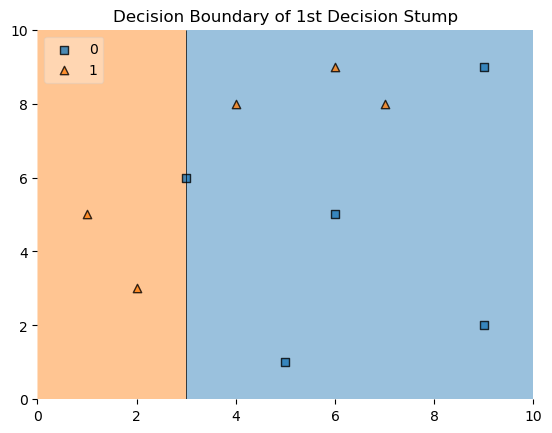

Model Weight (alpha1): 0.4236489301936017
   X1  X2  label  weights  y_pred  updated_weights  normalized_weights  \
0   1   5      1      0.1       1         0.065465            0.071429   
1   2   3      1      0.1       1         0.065465            0.071429   
2   3   6      0      0.1       0         0.065465            0.071429   
3   4   8      1      0.1       0         0.152753            0.166667   
4   5   1      0      0.1       0         0.065465            0.071429   
5   6   9      1      0.1       0         0.152753            0.166667   
6   6   5      0      0.1       0         0.065465            0.071429   
7   7   8      1      0.1       0         0.152753            0.166667   
8   9   9      0      0.1       0         0.065465            0.071429   
9   9   2      0      0.1       0         0.065465            0.071429   

   cumsum_lower  cumsum_upper  
0      0.000000      0.071429  
1      0.071429      0.142857  
2      0.142857      0.214286  
3      0.214286

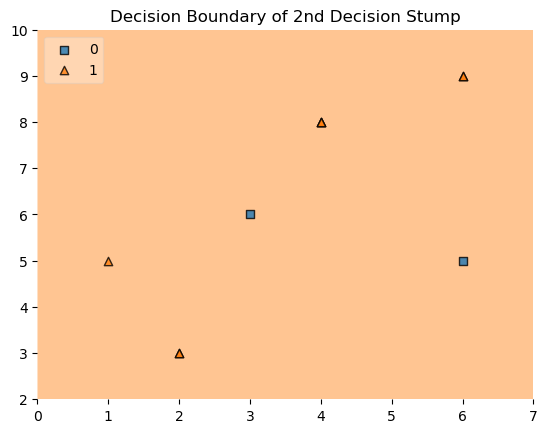

Model Weight (alpha2): 0.6931471805599453
   X1  X2  label  weights  y_pred  normalized_weights  cumsum_lower  \
0   6   5      0      0.1       1              0.2500        0.0000   
1   4   8      1      0.1       1              0.0625        0.2500   
2   3   6      0      0.1       1              0.2500        0.3125   
3   2   3      1      0.1       1              0.0625        0.5625   
4   1   5      1      0.1       1              0.0625        0.6250   
5   4   8      1      0.1       1              0.0625        0.6875   
6   6   9      1      0.1       1              0.0625        0.7500   
7   6   9      1      0.1       1              0.0625        0.8125   
8   4   8      1      0.1       1              0.0625        0.8750   
9   2   3      1      0.1       1              0.0625        0.9375   

   cumsum_upper  
0        0.2500  
1        0.3125  
2        0.5625  
3        0.6250  
4        0.6875  
5        0.7500  
6        0.8125  
7        0.8750  
8        0.937

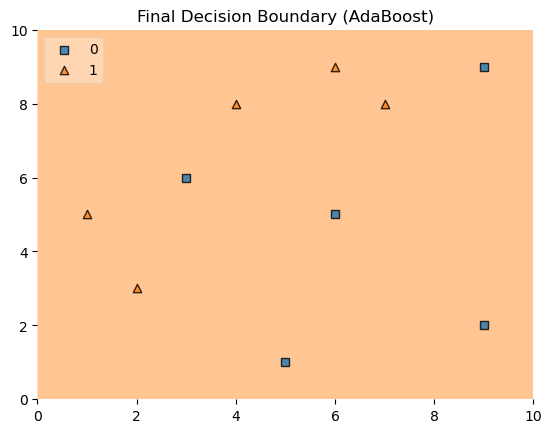

Final Prediction for query [1, 5]: [1.]
Final Prediction for query [9, 9]: [1.]


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Create a sample DataFrame
df = pd.DataFrame()
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
df['weights'] = 1 / df.shape[0]

# Plot the initial data points
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])
plt.show()

X = df[['X1', 'X2']].values
y = df['label'].values

# Train the first decision stump
dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(X, y)
plot_decision_regions(X, y, clf=dt1, legend=2)
plt.title("Decision Boundary of 1st Decision Stump")
plt.show()

df['y_pred'] = dt1.predict(X)
error1 = (df['label'] != df['y_pred']).dot(df['weights'])

def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)

alpha1 = calculate_model_weight(error1)
print(f"Model Weight (alpha1): {alpha1}")

def update_row_weights(row, alpha=alpha1):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights, axis=1)
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

print(df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights', 'normalized_weights', 'cumsum_lower', 'cumsum_upper']])

def create_new_dataset(df):
    indices = []
    for _ in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a > row['cumsum_lower']:
                indices.append(index)
                break
    return indices

index_values = create_new_dataset(df)
second_df = df.iloc[index_values].reset_index(drop=True)

# Train the second decision stump
dt2 = DecisionTreeClassifier(max_depth=1)
X2 = second_df[['X1', 'X2']].values
y2 = second_df['label'].values
dt2.fit(X2, y2)

plot_decision_regions(X2, y2, clf=dt2, legend=2)
plt.title("Decision Boundary of 2nd Decision Stump")
plt.show()

second_df['y_pred'] = dt2.predict(X2)
error2 = (second_df['label'] != second_df['y_pred']).dot(second_df['weights'])
alpha2 = calculate_model_weight(error2)
print(f"Model Weight (alpha2): {alpha2}")

def update_row_weights_second(row, alpha=alpha2):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

second_df['updated_weights'] = second_df.apply(update_row_weights_second, axis=1)
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

print(second_df[['X1', 'X2', 'label', 'weights', 'y_pred', 'normalized_weights', 'cumsum_lower', 'cumsum_upper']])

# Make predictions for new queries
query1 = np.array([1, 5]).reshape(1, -2)
query2 = np.array([9, 9]).reshape(1, -2)
pred_query1 = alpha1 * dt1.predict(query1) + alpha2 * dt2.predict(query1)
pred_query2 = alpha1 * dt1.predict(query2) + alpha2 * dt2.predict(query2)

# Plot the final decision boundary
plot_decision_regions(X, y, clf=dt2, legend=2)
plt.title("Final Decision Boundary (AdaBoost)")
plt.show()

print(f"Final Prediction for query [1, 5]: {np.sign(pred_query1)}")
print(f"Final Prediction for query [9, 9]: {np.sign(pred_query2)}")
